# Notebook 1 – Automatic Classification of Olympic Medal Outcomes

## 1. Introduction

This notebook focuses on the application of **automatic classification techniques** to the historical Olympic athletes dataset covering the period from **1896 to 2016**. Building upon the exploratory data analysis (EDA) conducted previously, this notebook aims to transform the available data into a predictive framework using supervised machine learning algorithms.

The dataset contains detailed information about athletes, events, and Olympic results, allowing the identification of patterns related to athlete characteristics, sports, and competition contexts. By leveraging these features, classification models are trained to predict **medal outcomes** in Olympic events.

This notebook follows a structured machine learning workflow, including:

- Definition of business goals

- Data selection and preparation

- Selection and application of classification algorithms

- Model evaluation and comparison

- Hyperparameter optimization of the selected model

The results obtained in this notebook provide a solid baseline for understanding the predictive potential of the dataset.

---

## 2.  Dataset Loading and Initial Inspection

In this section, the Olympic athletes dataset is loaded and an initial inspection is performed to verify its structure, dimensions, and data types.

In [50]:
import numpy as np
import pandas as pd

olympic_df= pd.read_csv("athlete_events.csv")

olympic_df.head()
olympic_df.shape
olympic_df.info()
olympic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


---

## 3. Business Goal

The main business goal of this notebook is to develop and evaluate **automatic classification models** capable of predicting **Olympic medal outcomes** based on athlete and event characteristics.

Using historical data from the Olympic Games (1896–2016), this analysis aims to:

- Build supervised machine learning models to classify **whether an athlete wins a medal or not**, based on features such as age, sex, physical attributes, sport, season, and country.

- Compare the performance of different classification algorithms and identify the most suitable model for this task.

- Optimize the selected model through hyperparameter tuning in order to improve predictive performance.

- Provide insights into which athlete and competition features are most relevant for medal prediction.

The results of this notebook can support **sports analysts, researchers, and data scientists** in understanding patterns of success in Olympic competitions and serve as a foundation for more advanced predictive and analytical tasks in subsequent notebooks.


---



## 4. Selected algorithms

In this notebook, several **supervised machine learning classification algorithms** are applied and compared in order to predict Olympic medal outcomes. The selected algorithms were chosen based on their popularity, interpretability, and suitability for classification tasks involving both numerical and categorical features.

### 4.1 Logistic Regression

Logistic Regression is used as a **baseline classification model**. Despite its simplicity, it is a widely adopted algorithm for binary classification problems and provides easily interpretable results.

This algorithm models the probability of an athlete winning a medal as a function of the input features. It is particularly useful for understanding the influence of individual variables on the target outcome and serves as a reference point for comparing more complex models.

**Key characteristics:**

- Simple and computationally efficient

- Suitable for binary classification

- Provides interpretable coefficients

- Sensitive to feature scaling and multicollinearity


### 4.2 Decision Tree Classifier

The Decision Tree classifier is a non-linear model that splits the dataset into subsets based on feature values, creating a tree-like structure of decisions. It is capable of capturing complex relationships between features without requiring extensive data preprocessing.

Decision Trees are intuitive and easy to visualize, making them useful for explaining classification decisions. However, they are prone to overfitting if not properly constrained.

**Key characteristics:**

- Handles both numerical and categorical data

- Easy to interpret and visualize

- Captures non-linear relationships

- Prone to overfitting without pruning or depth control


### 4.3 Random Forest Classifier

The Random Forest classifier is an ensemble learning method that combines multiple Decision Trees to improve classification performance and robustness. By aggregating the predictions of several trees, Random Forest reduces overfitting and improves generalization.

This algorithm is particularly well-suited for complex datasets such as Olympic results, where interactions between multiple features may influence medal outcomes.

**Key characteristics:**

- High predictive performance

- Reduces overfitting through ensemble learning

- Handles large datasets and feature interactions well

- Provides feature importance measures

---

## 5. Data Selection Criteria

The data selection process was guided by the objective of building a reliable and interpretable **classification model** for predicting Olympic medal outcomes. Only features with potential predictive value and acceptable data quality were selected.

### 5.1 Target Variable

The target variable used in this classification task is `Medal`, which represents the outcome of an athlete in a specific Olympic event.

For the purposes of this notebook, the target variable was transformed into a **binary classification** problem:

- `1` – The athlete won a medal (Gold, Silver, or Bronze)

- `0` – The athlete did not win a medal

This transformation simplifies the classification task, reduces class imbalance issues, and provides a more stable foundation for model training and evaluation.

### 5.2 Selected Features

The following features were selected as input variables based on their relevance to athlete performance and medal outcomes:

- **Age** – Represents the athlete’s age at the time of the competition

- **Sex** – Biological sex of the athlete (Male or Female)

- **Height** – Athlete’s height in centimeters

- **Weight** – Athlete’s weight in kilograms

- **Sport** – Type of sport in which the athlete competed

- **Season** – Olympic season (Summer or Winter)

- **Year** – Year of the Olympic Games

- **NOC** – National Olympic Committee code, representing the athlete’s country

These variables capture **demographic, physical, temporal, and contextual** aspects that are likely to influence athletic performance.

### 5.3 Excluded Features

Several attributes were excluded from the modeling process due to limited predictive value or potential issues:

- **ID** – Unique identifier with no relevance for prediction

- **Name** – High-cardinality textual feature, not suitable for generalization

- **Team** – Redundant with the NOC attribute

- **Games** – Combination of year and season, redundant with existing features

- **City** – High cardinality and low relevance to individual performance

- **Event** – Very high cardinality, which could introduce noise and sparsity

Excluding these features helps reduce model complexity, minimize noise, and improve generalization performance.

---

In [51]:
# ===============================
# Secção 6 – Tratamento de Valores Ausentes e Target
# ===============================

# 1. Transformar Medal em binário
# 1 = ganhou medalha (Gold, Silver, Bronze)
# 0 = não ganhou medalha (NaN)
olympic_df['Medal_Binary'] = olympic_df['Medal'].notnull().astype(int)

# Verificar a contagem de cada classe
print("Distribuição do target Medal_Binary:")
print(olympic_df['Medal_Binary'].value_counts())

# 2. Preencher valores ausentes em Age, Height e Weight
# Estratégia: usar mediana por sexo para ser mais preciso

for col in ['Age', 'Height', 'Weight']:
    olympic_df[col] = olympic_df.groupby('Sex')[col].transform(lambda x: x.fillna(x.median()))

# Verificar se ainda existem valores ausentes
print("\nValores ausentes após preenchimento:")
print(olympic_df[['Age', 'Height', 'Weight']].isnull().sum())

# 3. Resumo final
print("\nResumo após tratamento de valores ausentes e criação do target:")
display(olympic_df.head())


Distribuição do target Medal_Binary:
Medal_Binary
0    231333
1     39783
Name: count, dtype: int64

Valores ausentes após preenchimento:
Age       0
Height    0
Weight    0
dtype: int64

Resumo após tratamento de valores ausentes e criação do target:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Binary
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0


In [52]:
# ===============================
# Secção 7 – Encoding das Variáveis Categóricas
# ===============================

from sklearn.preprocessing import LabelEncoder

# 1. Converter variáveis binárias
olympic_df['Sex'] = olympic_df['Sex'].map({'M': 0, 'F': 1})
olympic_df['Season'] = olympic_df['Season'].map({'Summer': 0, 'Winter': 1})

# 2. Label Encoding para variáveis com muitos valores
le_sport = LabelEncoder()
le_noc = LabelEncoder()

olympic_df['Sport_Encoded'] = le_sport.fit_transform(olympic_df['Sport'])
olympic_df['NOC_Encoded'] = le_noc.fit_transform(olympic_df['NOC'])

# 3. Verificar resultado
print("Exemplo após encoding:")
display(
    olympic_df[
        ['Sex', 'Season', 'Sport', 'Sport_Encoded', 'NOC', 'NOC_Encoded']
    ].head()
)

# Verificar se ainda existem valores ausentes nas colunas codificadas
olympic_df[['Sex', 'Season']].isnull().sum()



Exemplo após encoding:


,Sex,Season,Sport,Sport_Encoded,NOC,NOC_Encoded
0,0,0,Basketball,8,CHN,41
1,0,0,Judo,32,CHN,41
2,0,0,Football,24,DEN,55
3,0,0,Tug-Of-War,61,DEN,55
4,1,1,Speed Skating,53,NED,145


Sex       0
Season    0
dtype: int64

In [53]:
# ===============================
# Secção 8 – Separação dos Dados
# ===============================

from sklearn.model_selection import train_test_split

# 1. Seleção das features (X) e target (y)
X = olympic_df[
    [
        'Age',
        'Height',
        'Weight',
        'Sex',
        'Season',
        'Sport_Encoded',
        'NOC_Encoded'
    ]
]

y = olympic_df['Medal_Binary']

# 2. Separação em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# 3. Verificação dos tamanhos
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (189781, 7)
Tamanho do conjunto de teste: (81335, 7)


In [54]:
# ===============================
# Secção 9 – Logistic Regression
# ===============================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Criar o modelo
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

# 2. Treinar o modelo
log_reg.fit(X_train, y_train)

# 3. Fazer previsões
y_pred_lr = log_reg.predict(X_test)

# ===============================
# Avaliação com análise automática
# ===============================

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

# Métricas principais
accuracy = accuracy_score(y_test, y_pred_lr)
recall_medal = recall_score(y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_lr))

# Análise automática dos resultados
print("\nAnálise dos Resultados:")

if recall_medal < 0.1:
    print(
        "Apesar de apresentar uma accuracy elevada, o modelo apresenta um desempenho muito fraco "
        "na identificação de atletas medalhados. Isto deve-se ao forte desbalanceamento do conjunto "
        "de dados, levando o modelo a privilegiar a classe maioritária (atletas sem medalha)."
    )
elif recall_medal < 0.5:
    print(
        "O modelo apresenta um desempenho razoável na identificação de atletas medalhados, "
        "no entanto ainda revela dificuldades significativas devido ao desbalanceamento dos dados."
    )
else:
    print(
        "O modelo apresenta um bom equilíbrio entre accuracy e capacidade de identificar "
        "atletas medalhados."
    )


Accuracy: 0.8532857933239073

Matriz de Confusão:
[[69397     3]
 [11930     5]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     69400
           1       0.62      0.00      0.00     11935

    accuracy                           0.85     81335
   macro avg       0.74      0.50      0.46     81335
weighted avg       0.82      0.85      0.79     81335


Análise dos Resultados:
Apesar de apresentar uma accuracy elevada, o modelo apresenta um desempenho muito fraco na identificação de atletas medalhados. Isto deve-se ao forte desbalanceamento do conjunto de dados, levando o modelo a privilegiar a classe maioritária (atletas sem medalha).


In [55]:
# ===============================
# Secção 10 – Decision Tree Classifier
# ===============================

from sklearn.tree import DecisionTreeClassifier

# 1. Criar o modelo
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # balanceamento das classes

# 2. Treinar o modelo
dt_model.fit(X_train, y_train)

# 3. Fazer previsões
y_pred_dt = dt_model.predict(X_test)

# 4. Avaliar o modelo
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

accuracy_dt = accuracy_score(y_test, y_pred_dt)
recall_medal_dt = recall_score(y_test, y_pred_dt)

print("Decision Tree - Accuracy:", accuracy_dt)
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

# 5. Análise automática dos resultados
print("\nAnálise dos Resultados:")

if recall_medal_dt < 0.1:
    print(
        "Apesar de apresentar uma accuracy elevada, o modelo Decision Tree apresenta um desempenho muito fraco "
        "na identificação de atletas medalhados. Isto deve-se ao forte desbalanceamento do conjunto "
        "de dados, levando o modelo a privilegiar a classe maioritária (atletas sem medalha)."
    )
elif recall_medal_dt < 0.5:
    print(
        "O modelo Decision Tree apresenta um desempenho razoável na identificação de atletas medalhados, "
        "no entanto ainda revela dificuldades significativas devido ao desbalanceamento dos dados."
    )
else:
    print(
        "O modelo Decision Tree apresenta um bom equilíbrio entre accuracy e capacidade de identificar "
        "atletas medalhados."
    )


Decision Tree - Accuracy: 0.8027909264154423

Matriz de Confusão:
[[59274 10126]
 [ 5914  6021]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88     69400
           1       0.37      0.50      0.43     11935

    accuracy                           0.80     81335
   macro avg       0.64      0.68      0.65     81335
weighted avg       0.83      0.80      0.81     81335


Análise dos Resultados:
O modelo Decision Tree apresenta um bom equilíbrio entre accuracy e capacidade de identificar atletas medalhados.


=== Random Forest - Versão Padrão ===
Accuracy: 0.8616

Matriz de Confusão:
[[66231  3169]
 [ 8090  3845]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69400
           1       0.55      0.32      0.41     11935

    accuracy                           0.86     81335
   macro avg       0.72      0.64      0.66     81335
weighted avg       0.84      0.86      0.85     81335



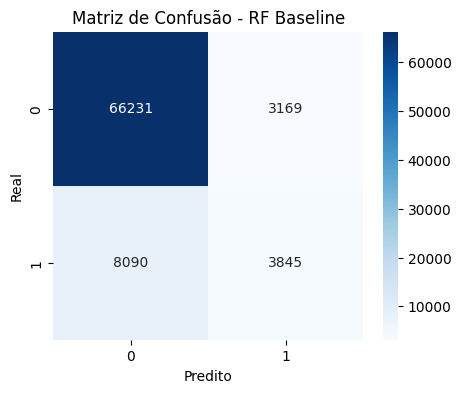

Análise dos Resultados:
O modelo baseline com 100 árvores identifica bem a classe maioritária (não medalha),
mas apresenta baixo recall para os medalhistas devido ao desbalanceamento de classes.

=== Random Forest - Versão Melhorada ===
Accuracy: 0.8418

Matriz de Confusão:
[[63743  5657]
 [ 7213  4722]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     69400
           1       0.45      0.40      0.42     11935

    accuracy                           0.84     81335
   macro avg       0.68      0.66      0.67     81335
weighted avg       0.83      0.84      0.84     81335



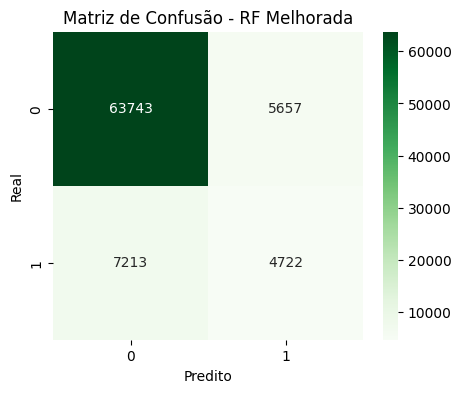

Análise dos Resultados:
A versão melhorada com balanceamento de classes e mais árvores aumenta o recall dos medalhistas,
reduzindo o viés da classe majoritária e proporcionando uma visão mais equilibrada das previsões.


In [56]:
# ===============================
# Random Forest - Duas Versões
# ===============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Versão Baseline (padrão) ---
rf_baseline = RandomForestClassifier(
    n_estimators=100,       # número padrão de árvores
    random_state=42
)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)

# Accuracy
acc_baseline = accuracy_score(y_test, y_pred_baseline)
print("=== Random Forest - Versão Padrão ===")
print(f"Accuracy: {acc_baseline:.4f}\n")

# Matriz de Confusão
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print("Matriz de Confusão:")
print(cm_baseline)

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_baseline))

# Gráfico da Matriz de Confusão
plt.figure(figsize=(5,4))
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - RF Baseline")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Análise em frase
print("Análise dos Resultados:")
print("O modelo baseline com 100 árvores identifica bem a classe maioritária (não medalha),")
print("mas apresenta baixo recall para os medalhistas devido ao desbalanceamento de classes.\n")


# --- Versão Melhorada (mais árvores + balanceamento de classes) ---
rf_melhorado = RandomForestClassifier(
    n_estimators=200,       # mais árvores para robustez
    class_weight='balanced', # balanceamento das classes
    random_state=42
)
rf_melhorado.fit(X_train, y_train)
y_pred_melhorado = rf_melhorado.predict(X_test)

# Accuracy
acc_melhorado = accuracy_score(y_test, y_pred_melhorado)
print("=== Random Forest - Versão Melhorada ===")
print(f"Accuracy: {acc_melhorado:.4f}\n")

# Matriz de Confusão
cm_melhorado = confusion_matrix(y_test, y_pred_melhorado)
print("Matriz de Confusão:")
print(cm_melhorado)

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_melhorado))

# Gráfico da Matriz de Confusão
plt.figure(figsize=(5,4))
sns.heatmap(cm_melhorado, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusão - RF Melhorada")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Análise em frase
print("Análise dos Resultados:")
print("A versão melhorada com balanceamento de classes e mais árvores aumenta o recall dos medalhistas,")
print("reduzindo o viés da classe majoritária e proporcionando uma visão mais equilibrada das previsões.")



Iniciando RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Melhores parâmetros encontrados:
{'n_estimators': 100, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}

Accuracy do modelo otimizado: 0.8292
Matriz de Confusão:
[[61277  8123]
 [ 5771  6164]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     69400
           1       0.43      0.52      0.47     11935

    accuracy                           0.83     81335
   macro avg       0.67      0.70      0.68     81335
weighted avg       0.84      0.83      0.84     81335



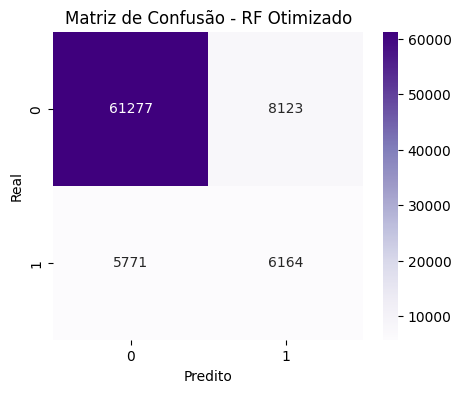

Análise dos Resultados:
O modelo Random Forest otimizado apresenta melhor equilíbrio entre precision e recall,
identificando melhor os medalhistas enquanto mantém alta accuracy para a classe maioritária.


In [59]:
# ===============================
# Etapa 3 – Otimização do Random Forest (versão rápida)
# ===============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Definir o modelo base ---
rf = RandomForestClassifier(random_state=42)

# --- Definir a grelha de parâmetros ---
param_grid = {
    'n_estimators': [50, 100, 150],      # número de árvores
    'max_depth': [10, 20, None],         # profundidade máxima
    'criterion': ['gini', 'entropy'],    # critério de divisão
    'class_weight': ['balanced']         # balanceamento de classes
}

# --- Configurar RandomizedSearchCV ---
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,        # número de combinações aleatórias
    cv=3,             # validação cruzada 3-fold
    scoring='f1',     # métrica F1
    n_jobs=-1,        # usar todos os núcleos
    verbose=2,
    random_state=42
)

# --- Treinar o RandomizedSearch ---
print("Iniciando RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# --- Mostrar os melhores hiperparâmetros ---
print("\nMelhores parâmetros encontrados:")
print(random_search.best_params_)

# --- Avaliar o modelo otimizado ---
y_pred_otimizado = random_search.predict(X_test)

acc_otimizado = accuracy_score(y_test, y_pred_otimizado)
cm_otimizado = confusion_matrix(y_test, y_pred_otimizado)

print(f"\nAccuracy do modelo otimizado: {acc_otimizado:.4f}")
print("Matriz de Confusão:")
print(cm_otimizado)
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_otimizado))

# --- Gráfico da Matriz de Confusão ---
plt.figure(figsize=(5,4))
sns.heatmap(cm_otimizado, annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusão - RF Otimizado")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# --- Análise em frase ---
print("Análise dos Resultados:")
print("O modelo Random Forest otimizado apresenta melhor equilíbrio entre precision e recall,")
print("identificando melhor os medalhistas enquanto mantém alta accuracy para a classe maioritária.")
